## EMAIL SPAM DETECTOR

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/spam-email/spam.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv(r"/kaggle/input/spam-email/spam.csv", encoding='latin1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

## Data Visualization

<Axes: xlabel='Category', ylabel='count'>

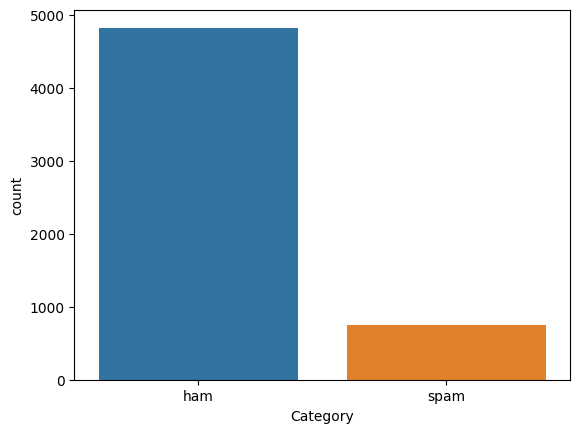

In [5]:
sns.countplot(data=df, x='Category')

<Axes: ylabel='count'>

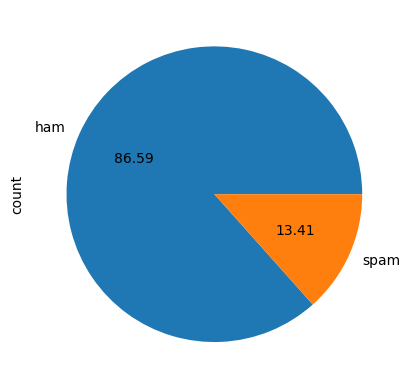

In [6]:
df["Category"].value_counts().plot(kind='pie',autopct='%.2f')

## Encoding

In [7]:
df["label"]=df["Category"].replace({"ham":0,"spam":1})
df

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ã¼ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
df["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
nlp=spacy.load("en_core_web_sm")

## Preprocessing (removing stop words and doing lemmatization) 

In [10]:
def preprocess (text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [11]:
df["Message"]=df['Message'].apply(lambda x : preprocess(x))

In [12]:
df

,Category,Message,label
0,ham,jurong point crazy available bugis n great wor...,0
1,ham,ok lar joke wif u oni,0
2,spam,free entry 2 wkly comp win FA Cup final tkts 2...,1
3,ham,u dun early hor u c,0
4,ham,nah think go usf live,0
...,...,...,...
5567,spam,2nd time try 2 contact u. U win â£750 Pound pr...,1
5568,ham,ã¼ b go esplanade fr home,0
5569,ham,pity mood suggestion,0
5570,ham,guy bitching act like interested buy week give...,0


In [13]:
preprocess("Thor ate pizza")

'thor eat pizza'

## Train_Test_Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.label, test_size=0.2, random_state=2022)

In [15]:
print(x_train.shape)
print(x_test.shape)

(4457,)
(1115,)


In [16]:
x_train

4422                   west coast haiz Ã'll forever come
5398                          hi hope good day well night
4880       yeah open chat click friend list list easy pie
3499                                     say go bed sleep
4314                        babe swollen gland throat end
                              ...                        
5047    Desires- u go doctor 4 liver bit stylish ur ha...
4720    Aiyo lesson early sleepin haha okie u home lia...
173                                       time come later
1244                                  shoot doc wait room
4989                                    channel:-):-):):-
Name: Message, Length: 4457, dtype: object

## Text Vectorization and model training:

## Naive_Bayes

In [17]:
model1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])
model1

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Multi NB', MultinomialNB())])

In [18]:
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       946
           1       1.00      0.77      0.87       169

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [19]:
v = model1.named_steps['vectorizer_tfidf']
vocabulary = v.get_feature_names_out()
for word in vocabulary:
    index=v.vocabulary_.get(word)
    idf_score=v.idf_[index]
    print(f"{word} : {idf_score}")

00 : 7.323013972265978
000 : 6.3114130605874985
008704050406 : 8.70930833338587
0089 : 8.70930833338587
0121 : 8.70930833338587
01223585334 : 8.303843225277705
0125698789 : 8.70930833338587
02 : 7.456545364890501
0207 : 8.303843225277705
02072069400 : 8.70930833338587
021 : 8.303843225277705
03 : 6.917548864157814
04 : 7.099870420951769
0430 : 8.70930833338587
05 : 7.793017601511714
0578 : 8.303843225277705
06 : 7.323013972265978
07 : 8.70930833338587
07008009200 : 8.70930833338587
07046744435 : 8.70930833338587
07090298926 : 8.70930833338587
07099833605 : 8.70930833338587
07123456789 : 8.303843225277705
07732584351 : 8.70930833338587
07734396839 : 8.70930833338587
07742676969 : 8.70930833338587
07753741225 : 8.70930833338587
0776xxxxxxx : 8.70930833338587
07781482378 : 8.303843225277705
07786200117 : 8.70930833338587
078 : 8.70930833338587
07801543489 : 8.70930833338587
07808247860 : 8.70930833338587
07808726822 : 8.70930833338587
07815296484 : 8.70930833338587
07821230901 : 8.3038432

In [ ]:
y_pred1

In [ ]:
model1.predict(["Congratulations! You've won a free vacation to an exotic island. Claim your prize now by clicking on the link below: [link]"])

## KNN Classifier

In [20]:
model2 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])
model2

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [21]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       946
           1       0.98      0.32      0.48       169

    accuracy                           0.90      1115
   macro avg       0.94      0.66      0.71      1115
weighted avg       0.91      0.90      0.87      1115



## RandomForestClassifier

In [22]:
model3 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])
model3

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())])

In [24]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       946
           1       1.00      0.83      0.91       169

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.97      0.97      0.97      1115



## We can see that Random Forest Classifier gives more accuracy and less error than other models !!

## Predicting 

In [26]:
Mails=["Don't forget to bring your ID and passport for your flight tomorrow.",
       "You've been selected for a special offer. Click to receive a $1,000 gift card. Claim",
       "You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) ",
       "Hi John, just checking in to see if you received my email from yesterday.",
       "Congratulations! You've won a free iPhone. Click here to claim your prize now!"
      ]
for i in Mails:
    x=model3.predict([i])
    if(x==0):
        print("NonSpam Mail")
    elif(x==1):
        print("Spam Mail")

# Spam=1
# Non Spam=0

NonSpam Mail
Spam Mail
Spam Mail
NonSpam Mail
Spam Mail
